### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Importing data

In [2]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.duplicated().sum()

0

### Data visualization

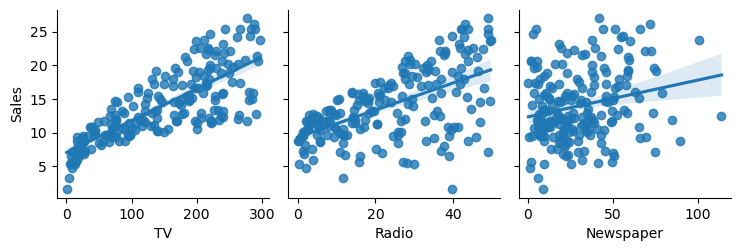

In [6]:
sns.pairplot(df,x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales' , kind='reg')

### Modelling

In [7]:
#Linear regression

x = df.drop(columns='Sales')
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 25)

In [8]:
logr = LinearRegression()
logr.fit(x_train, y_train)

y_pred_lr = logr.predict(x_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Mean Squared Error: {mse_lr}')
print(f'R-squared: {r2_lr}')


print('''Model's accuracy: ''',(logr.score(x_test, y_test)) * 100)

Mean Squared Error: 2.753021266749734
R-squared: 0.8926200930417253
Model's accuracy:  89.26200930417252


In [9]:
#GradientBoostingRegressor

model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(x_train, y_train)

y_pred_gb = model_gb.predict(x_test)

In [10]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Mean Squared Error: {mse_gb}')
print(f'R-squared: {r2_gb}')
print('''Model's accuracy: ''',(model_gb.score(x_test, y_test)) * 100)

Mean Squared Error: 0.55930109581236
R-squared: 0.9781848035991028
Model's accuracy:  97.81848035991028


In this task Linear Regression and Gradient Booster Regressor is used to predict the sales. it can be seen that both Linear Regression and Gradient Booster Regressor gives good accuracy indicating that they both are good fit, but Gradient Booster Regressor gives much better accuracy than Linear Regression.